<center><h1><font color=yellow><i> Deep Learning </i></font></h1></center>

## $Import$ $Libraries$ :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import keras_tuner


## $Data$ :

<b><font color="skyblue">Step 1:</font></b>
 
- Import **data** (pandas dataframe). 

In [2]:
df_spam=pd.read_csv('spam.csv')
df_spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


<b><font color="skyblue">Step 2:</font></b>
 
- Separate the output (the column `spam`) and the input (the other columns). 

In [3]:
y=df_spam['spam']
X=df_spam.drop('spam',axis=1)

In [4]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [5]:
X.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [6]:
X.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


<b><font color="skyblue">Step 3:</font></b>
 
- Split our data into **train data** (80% -- 3680 rows) and **test data** (921 rows). 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## $Building$ $our$ $Model$ :

<b><font color="skyblue">Step 1:</font></b>
 
- Creation of our model using **Keras**.

In [8]:
model = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[57], name='hidden_layer1'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.Dense(100, activation='relu', name='hidden_layer2'),
    layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid', name='output_layer'),  # Changement de l'activation en 'sigmoid'
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 100)               5800      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                        

<b><font color="skyblue">Step 2:</font></b>
 
- Precise the `optimizer`, the `loss-fonction` & the `metric`.

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

<b><font color="skyblue">Step 3:</font></b>
 
- Train the model.

In [11]:
hist = model.fit(X_train,
                 y_train,
                 batch_size=32,
                 epochs=50,
                 validation_split=0.2)

Epoch 1/50


92/92 [==============================] - 2s 6ms/step - loss: 0.6878 - accuracy: 0.6501 - val_loss: 0.5802 - val_accuracy: 0.6957
Epoch 2/50
92/92 [==============================] - 0s 3ms/step - loss: 0.6302 - accuracy: 0.6841 - val_loss: 0.5802 - val_accuracy: 0.6807
Epoch 3/50
92/92 [==============================] - 0s 3ms/step - loss: 0.6075 - accuracy: 0.6919 - val_loss: 0.5820 - val_accuracy: 0.6630
Epoch 4/50
92/92 [==============================] - 0s 3ms/step - loss: 0.5909 - accuracy: 0.6892 - val_loss: 0.5957 - val_accuracy: 0.6413
Epoch 5/50
92/92 [==============================] - 0s 3ms/step - loss: 0.5710 - accuracy: 0.7082 - val_loss: 0.5835 - val_accuracy: 0.6440
Epoch 6/50
92/92 [==============================] - 0s 3ms/step - loss: 0.5485 - accuracy: 0.7164 - val_loss: 0.5845 - val_accuracy: 0.6495
Epoch 7/50
92/92 [==============================] - 0s 3ms/step - loss: 0.5420 - accuracy: 0.7164 - val_loss: 0.5697 - val_accuracy: 0.6562
Epoch 8/50
92/92 [=============

<b><font color='red'>PS :</font></b> The accuracy of our model on the validation data is **93%**

<b><font > Keras tuner </font></b> 

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from sklearn.metrics import accuracy_score

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int('units1', min_value=50, max_value=200, step=10),
                           activation='relu', input_shape=[57], name='hidden_layer1'))
    model.add(layers.Dropout(hp.Float('dropout1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units2', min_value=50, max_value=200, step=10),
                           activation='relu', name='hidden_layer2'))
    model.add(layers.Dropout(hp.Float('dropout2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid', name='output_layer'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Choisissez le nombre d'essais que vous voulez
    executions_per_trial=3,  # Nombre d'exécutions par essai pour réduire la variabilité
    directory='my_dir',
    project_name='keras_tuner'
)

tuner.search_space_summary()  # Afficher un résumé de l'espace de recherche des hyperparamètres

tuner.search(X_train, y_train,
             epochs=10,
             validation_data=(X_val, y_val))

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]


Reloading Tuner from my_dir\keras_tuner\tuner0.json
Search space summary
Default search space size: 5
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 10, 'sampling': 'linear'}
dropout1 (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 200, 'step': 10, 'sampling': 'linear'}
dropout2 (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


C:\Users\zaiss\AppData\Local\Temp\ipykernel_28640\3570546533.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [14]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 150)               8700      
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 hidden_layer2 (Dense)       (None, 70)                10570     
                                                                 
 dropout_1 (Dropout)         (None, 70)                0         
                                                                 
 batch_normalization (Batch  (None, 70)                280       
 Normalization)                                                  
                                                                 
 output_layer (Dense)        (None, 1)                 71        
                                                        

In [15]:
tuner.results_summary(num_trials=5)


Results summary
Results in my_dir\keras_tuner
Showing 5 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
units1: 150
dropout1: 0.2
units2: 70
dropout2: 0.2
learning_rate: 0.01
Score: 0.9352355003356934

Trial 3 summary
Hyperparameters:
units1: 60
dropout1: 0.30000000000000004
units2: 150
dropout2: 0.4
learning_rate: 0.01
Score: 0.8759057919184366

Trial 2 summary
Hyperparameters:
units1: 120
dropout1: 0.4
units2: 150
dropout2: 0.30000000000000004
learning_rate: 0.0001
Score: 0.7164855003356934

Trial 0 summary
Hyperparameters:
units1: 100
dropout1: 0.30000000000000004
units2: 190
dropout2: 0.4
learning_rate: 0.001
Score: 0.7155797084172567

Trial 1 summary
Hyperparameters:
units1: 100
dropout1: 0.2
units2: 190
dropout2: 0.4
learning_rate: 0.0001
Score: 0.7142210006713867


In [16]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

best_learning_rate = best_hyperparameters.get('learning_rate')
best_units_hidden_layer1= best_hyperparameters.get('units1')
best_units_hidden_layer2 = best_hyperparameters.get('units2')
dropouts1 = best_hyperparameters.get('dropout1')
dropouts2 = best_hyperparameters.get('dropout2')
# Add more lines to retrieve other hyperparameters based on your search space

print("Best hyperparameters:")
print(f"Learning Rate: {best_learning_rate}")
print(f"Units in Hidden Layer 1: {best_units_hidden_layer1}")
print(f"Units in Hidden Layer 2: {best_units_hidden_layer2}")
print(f"dropout1: {dropouts1}")
print(f"dropout2: {dropouts2}")



Best hyperparameters:
Learning Rate: 0.01
Units in Hidden Layer 1: 150
Units in Hidden Layer 2: 70
dropout1: 0.2
dropout2: 0.2


--Old version

In [17]:

# def build_model(hp):
#   model =  keras.Sequential([
#     layers.Dense(100, activation='relu', input_shape=[57], name='hidden_layer1'),
#     layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
#     layers.Dense(100, activation='relu', name='hidden_layer2'),
#     layers.Dropout(0.3),  # Ajout d'une couche Dropout pour réduire le surajustement
#     layers.BatchNormalization(),
    
# ])
#   model.add(keras.layers.Dense(
#       hp.Choice('units', [8, 16, 32]),
#       activation='relu'))
#   model.add(keras.layers.Dense(1, activation='sigmoid', name='output_layer') )# Changement de l'activation en 'sigmoid'
#   model.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['accuracy'],
# )
#   return model

In [18]:
# tuner = keras_tuner.RandomSearch(
#     build_model,
#     objective='val_loss',
#     max_trials=5)

In [19]:
# tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val))
# best_model = tuner.get_best_models()[0]

## $Evaluate$ $Our$ $Model$ :

<b><font color="skyblue">Step 1:</font></b>
 
- Transform our data into a numpy/list data.

In [20]:
X_test=X_test.values

y_test=y_test.values

<b><font color="skyblue">Step 2:</font></b>
 
- Evaluate our model on the test data.

In [21]:
loss, accuracy_DNN = model.evaluate(X_test, y_test)
print('Loss on test data:', loss)
print('Accuracy on test data:', accuracy_DNN)

29/29 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.9262
Loss on test data: 0.24991606175899506
Accuracy on test data: 0.9261671900749207


## $Predict$ :

In [22]:
# Predict probabilities for each class
predictions_proba = model.predict(X_test)

# Convert probabilities to predicted labels (0 or 1 in this binary classification case)
predictions = (predictions_proba > 0.5).astype(int)

# Display the predictions
print("Predicted probabilities:", predictions_proba[:10])  # Display the predicted probabilities for the first 10 samples
print("Predicted labels:", predictions[:10])  # Display the predicted labels for the first 10 samples


29/29 [==============================] - 0s 2ms/step
Predicted probabilities: [[0.991823  ]
 [0.9841308 ]
 [0.6171999 ]
 [0.9877957 ]
 [0.16986284]
 [0.00596686]
 [0.99991727]
 [0.0745934 ]
 [0.99973583]
 [0.9720808 ]]
Predicted labels: [[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]]


# Logistic regression
We're gonna use the same set of X_train, X_test, y_train and y_test data in the first section

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#### Building the logistec regression model

In [24]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=16, max_iter=1000, solver='lbfgs', C=0.1).fit(X_train, y_train)
#predicted values
y_pred = logistic_model.predict(X_test)

#### Evaluating the model

##### Confusion matrix

In [25]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[505,  34],
       [ 40, 342]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

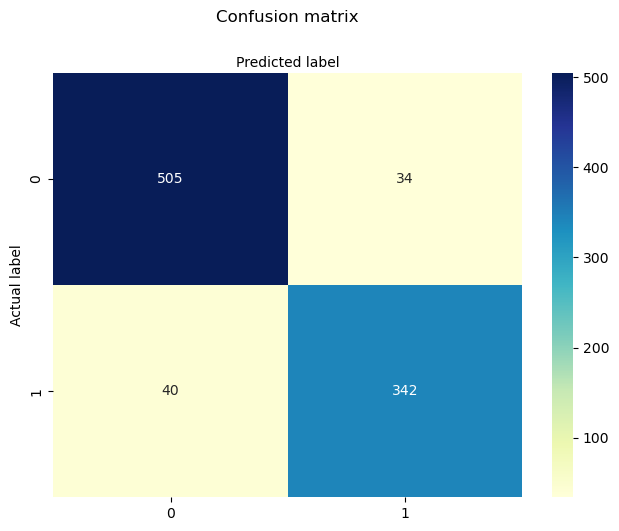

In [26]:
#visualizing the confusion matrix
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [27]:
from sklearn.metrics import classification_report
target_names = ['not spam', 'spam']
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

    not spam       0.93      0.94      0.93       539
        spam       0.91      0.90      0.90       382

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



##### ROC Curve 

to Ilyass : fchkal had score f test acc 96% w train 92%

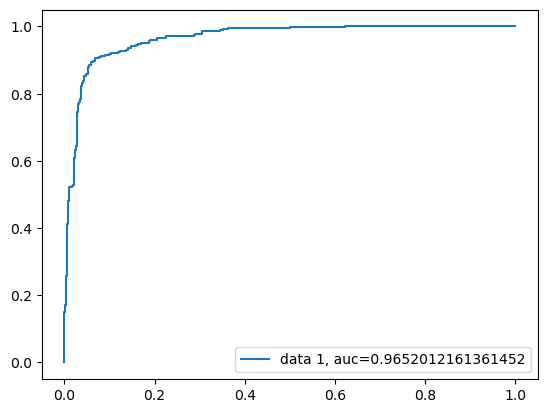

In [28]:
y_pred_proba = logistic_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Validation croisée 
Nous allons utilisé **GridSearchCV**  pour trouver les meilleurs hyperparamètres d'un modèle tout en utilisant la validation croisée pour évaluer les performances. 

In [29]:
from sklearn.model_selection import GridSearchCV
#model
logisticReg = LogisticRegression()

# Grille des hyperparamètres à explorer
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear'],
    'max_iter': [500, 1000]
}

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=6, scoring='accuracy')

# Exécution de la recherche par grille avec validation croisée
grid_search.fit(X_train, y_train)

# Récupération des meilleurs hyperparamètres et du meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Meilleurs hyperparamètres :", best_params)
print("Meilleur score obtenu :", best_score)

Meilleurs hyperparamètres : {'C': 10.0, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Meilleur score obtenu : 0.9266343767767853


Choix final des hyperparams

In [30]:
logistic_model = LogisticRegression(penalty='l1', max_iter=500, solver='liblinear', C=10, random_state=16).fit(X_train, y_train)


Evaluation du modèle finale 

Text(0.5, 427.9555555555555, 'Predicted label')

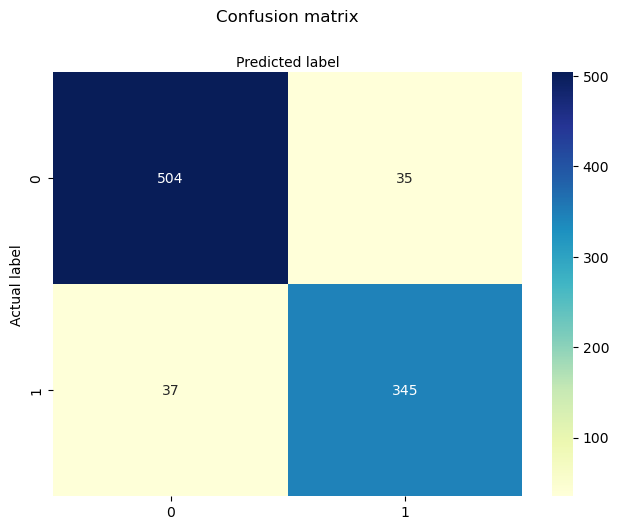

In [31]:
y_pred = logistic_model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [32]:
target_names = ['not spam', 'spam']
accuracy_LR_test = accuracy_score(y_test, y_pred)
print("Précision du modèle :", accuracy_LR_test)
print(classification_report(y_test, y_pred, target_names=target_names))


Précision du modèle : 0.9218241042345277
              precision    recall  f1-score   support

    not spam       0.93      0.94      0.93       539
        spam       0.91      0.90      0.91       382

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



ROC Curve

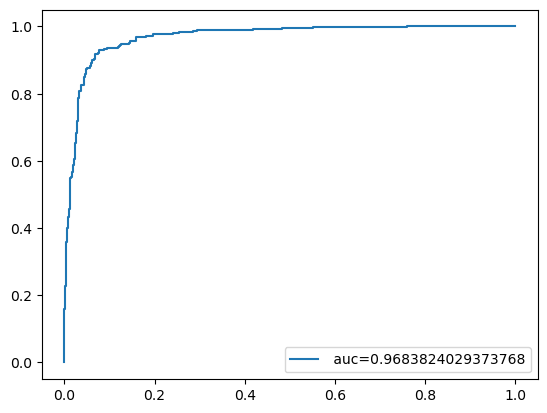

In [33]:
y_pred_proba = logistic_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Gradient boosting

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



# Initialisation du modèle de Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Entraînement du modèle sur les données d'entraînement
gradient_boosting_model.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = gradient_boosting_model.predict(X_test)



# Évaluation des performances du modèle
target_names = ['not spam', 'spam']
accuracy_GB_test = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred,target_names=target_names)

print("Précision du modèle :", accuracy_GB_test)
print("Rapport de classification :\n", report)


Précision du modèle : 0.9413680781758957
Rapport de classification :
               precision    recall  f1-score   support

    not spam       0.95      0.95      0.95       549
        spam       0.93      0.92      0.93       372

    accuracy                           0.94       921
   macro avg       0.94      0.94      0.94       921
weighted avg       0.94      0.94      0.94       921



In [36]:
print(f'accuracy logistic regression :{accuracy_LR_test},accuracy DNN {accuracy_DNN}, accuracy Gradient boosting {accuracy_GB_test}')

accuracy logistic regression :0.9218241042345277,accuracy DNN 0.9261671900749207, accuracy Gradient boosting 0.9413680781758957
